# Objects Detection

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

- https://pjreddie.com/darknet/yolo/
- https://github.com/pjreddie/darknet

In [1]:
!mkdir -p ./.tmp

### YOLOv3-tiny

In [3]:
!curl https://pjreddie.com/media/files/yolov3-tiny.weights -o ./.tmp/yolov3-tiny.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.7M  100 33.7M    0     0  1923k      0  0:00:17  0:00:17 --:--:-- 3524k61k


In [50]:
!curl https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg -o ./.tmp/yolov3-tiny.cfg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1915  100  1915    0     0   9720      0 --:--:-- --:--:-- --:--:--  9720
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.7M  100 33.7M    0     0  1896k      0  0:00:18  0:00:18 --:--:-- 2977k


In [89]:
!cat ./.tmp/yolov3-tiny.cfg

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filter

In [92]:
INPUT_IMAGE_WIDTH = 416
INPUT_IMAGE_HEIGHT = 416
INPUT_IMAGE_CHANNELS = 3

### YOLOv3

In [51]:
!curl https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -o ./.tmp/yolov3.cfg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8342  100  8342    0     0  38091      0 --:--:-- --:--:-- --:--:-- 38091


In [52]:
!curl https://pjreddie.com/media/files/yolov3.weights -o ./.tmp/yolov3.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  236M  100  236M    0     0  2753k      0  0:01:27  0:01:27 --:--:-- 5003k


### COCO Names

In [150]:
!curl https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -o ./.tmp/coco.names

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   625  100   625    0     0   4006      0 --:--:-- --:--:-- --:--:--  4006


In [152]:
!cat ./.tmp/coco.names

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


### Convert

In [90]:
# @TODO

### Import

In [230]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import cv2

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


### Loading the model

In [231]:
yolov3_tiny = tf.keras.models.load_model('./yolov3-tiny.h5')

In [232]:
yolov3_tiny.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 1 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 1 64          conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, None, None, 1 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### Load image

In [233]:
input_image = cv2.imread('./images/01.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

In [234]:
input_image.shape

(768, 1024, 3)

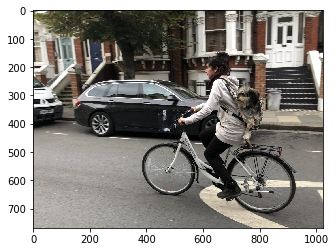

In [235]:
plt.imshow(input_image)
plt.show()

In [236]:
input_image_resized = cv2.resize(input_image, (INPUT_IMAGE_WIDTH, INPUT_IMAGE_HEIGHT))

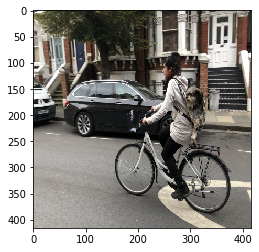

In [237]:
plt.imshow(input_image_resized)
plt.show()

In [29]:
# cropped_image = img[:416, :416]
# cropped_image = cropped_image / 255

In [238]:
input_image_normalized = input_image_resized / 255.

In [239]:
input_image_normalized

array([[[0.95686275, 0.96078431, 0.93333333],
        [0.92156863, 0.94901961, 0.89019608],
        [0.83529412, 0.88627451, 0.82745098],
        ...,
        [0.36862745, 0.36470588, 0.32156863],
        [0.13333333, 0.13333333, 0.12156863],
        [0.09411765, 0.09019608, 0.10588235]],

       [[0.90980392, 0.90980392, 0.89411765],
        [0.7254902 , 0.74901961, 0.70980392],
        [0.69019608, 0.73333333, 0.68627451],
        ...,
        [0.34509804, 0.3372549 , 0.29803922],
        [0.10588235, 0.10588235, 0.09411765],
        [0.08235294, 0.08235294, 0.09019608]],

       [[0.47058824, 0.45882353, 0.4627451 ],
        [0.41568627, 0.42745098, 0.39607843],
        [0.48627451, 0.51764706, 0.47058824],
        ...,
        [0.36470588, 0.35686275, 0.32156863],
        [0.09019608, 0.09019608, 0.07843137],
        [0.07843137, 0.07843137, 0.07843137]],

       ...,

       [[0.71372549, 0.70196078, 0.6745098 ],
        [0.70980392, 0.69803922, 0.67058824],
        [0.69411765, 0

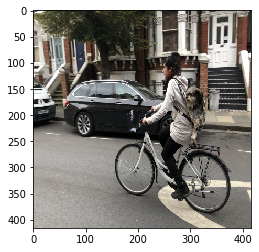

In [240]:
plt.imshow(input_image_normalized)
plt.show()

In [241]:
input_image_batch = np.array([
    input_image_normalized,
#     input_image_normalized,
])

In [242]:
input_image_batch.shape

(1, 416, 416, 3)

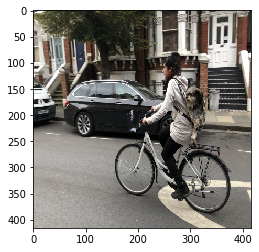

In [243]:
plt.imshow(input_image_batch[0])
plt.show()

In [244]:
predictions = yolov3_tiny.predict(input_image_batch)

In [246]:
print('predictions list length: ', len(predictions))
print('predictions[0].shape: ', predictions[0].shape)
print('predictions[1].shape: ', predictions[1].shape)

predictions list length:  2
predictions[0].shape:  (1, 13, 13, 255)
predictions[1].shape:  (1, 26, 26, 255)


In [139]:
predictions[1][0]

array([[[ 5.4981983e-01, -1.3133135e-01,  8.9770682e-02, ...,
         -6.1694965e+00, -6.3859706e+00, -6.1867743e+00],
        [-5.0839210e-01, -6.9665539e-01,  8.2938087e-01, ...,
         -5.3030224e+00, -6.5450463e+00, -6.3859982e+00],
        [-2.7904445e-01, -5.8090347e-01,  1.1651068e+00, ...,
         -5.0141792e+00, -7.0370345e+00, -7.5835834e+00],
        ...,
        [-4.5871440e-01, -4.1548082e-01,  1.0419152e+00, ...,
         -7.8742952e+00, -6.4166427e+00, -6.8441067e+00],
        [ 3.0667901e-01, -7.5169182e-01,  7.4347258e-01, ...,
         -7.6315413e+00, -6.4352617e+00, -6.6705303e+00],
        [-5.7574749e-02,  1.8062215e-01, -4.6361595e-02, ...,
         -6.4831400e+00, -5.7801342e+00, -6.0433831e+00]],

       [[-1.3510233e-01,  2.1929768e-01, -2.7850297e-01, ...,
         -5.2818651e+00, -6.7586484e+00, -7.0268703e+00],
        [-2.8117311e-01, -3.9819172e-01,  3.7494689e-01, ...,
         -5.2939243e+00, -8.0919037e+00, -9.0620909e+00],
        [-4.4458586e-01, 

In [141]:
yolov3 = tf.keras.models.load_model('./.tmp/yolov3.h5')

In [142]:
yolov3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [144]:
predictions_v3 = yolov3.predict(input_image_batch)

In [149]:
print('predictions_v3 list length: ', len(predictions_v3))
print('predictions_v3[0].shape: ', predictions_v3[0].shape)
print('predictions_v3[1].shape: ', predictions_v3[1].shape)
print('predictions_v3[2].shape: ', predictions_v3[2].shape)

predictions_v3 list length:  3
predictions_v3[0].shape:  (1, 13, 13, 255)
predictions_v3[1].shape:  (1, 26, 26, 255)
predictions_v3[2].shape:  (1, 52, 52, 255)


### CV2

In [153]:
net = cv2.dnn.readNet('./.tmp/yolov3-tiny.weights', './.tmp/yolov3-tiny.cfg')

In [155]:
net.getLayerNames()

['conv_0',
 'bn_0',
 'relu_0',
 'pool_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'pool_3',
 'conv_4',
 'bn_4',
 'relu_4',
 'pool_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'pool_7',
 'conv_8',
 'bn_8',
 'relu_8',
 'pool_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'pool_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'relu_18',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'relu_21',
 'conv_22',
 'permute_23',
 'yolo_23']

In [156]:
classes = []
with open('./.tmp/coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [157]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [158]:
layer_names = net.getLayerNames()

In [160]:
unconnected_layers = net.getUnconnectedOutLayers()
unconnected_layers

array([[36],
       [48]], dtype=int32)

In [163]:
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_16', 'yolo_23']

In [209]:
cv2_input_image = cv2.imread('./images/06.jpg')

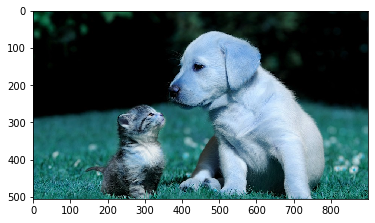

In [210]:
plt.imshow(cv2_input_image)
plt.show()

In [211]:
blob = cv2.dnn.blobFromImage(cv2_input_image, 1, (416, 416), (0, 0, 0), True, crop=False)
blob

array([[[[ 19.,  15.,  12., ...,   9.,  11.,   9.],
         [ 20.,  16.,  13., ...,   9.,   9.,   8.],
         [ 21.,  18.,  16., ...,   8.,   7.,   6.],
         ...,
         [111., 114., 114., ...,  89.,  76.,  73.],
         [101., 113., 120., ...,  65.,  58.,  54.],
         [104., 112., 122., ...,  48.,  58.,  63.]],

        [[ 41.,  37.,  33., ...,  11.,  13.,  11.],
         [ 43.,  39.,  36., ...,  10.,  10.,  10.],
         [ 47.,  43.,  42., ...,   9.,   8.,   7.],
         ...,
         [126., 125., 121., ..., 107.,  91.,  88.],
         [118., 124., 127., ...,  82.,  74.,  70.],
         [122., 124., 128., ...,  64.,  74.,  79.]],

        [[  3.,   0.,   0., ...,   7.,   1.,   0.],
         [  3.,   0.,   0., ...,   5.,   1.,   0.],
         [  2.,   0.,   0., ...,   2.,   0.,   0.],
         ...,
         [ 30.,  29.,  24., ...,  16.,   7.,   6.],
         [ 18.,  26.,  27., ...,   4.,   0.,   1.],
         [ 20.,  24.,  28., ...,   0.,   2.,   7.]]]], dtype=float32)

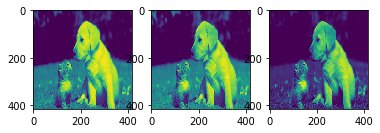

In [212]:
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(blob[0][0])
axarr[1].imshow(blob[0][1])
axarr[2].imshow(blob[0][2])
plt.show()

In [213]:
net.setInput(blob)

In [214]:
outs = net.forward(output_layers)

In [215]:
print('outs list length: ', len(outs))
print('outs[0].shape: ', outs[0].shape)
print('outs[1].shape: ', outs[1].shape)

outs list length:  2
outs[0].shape:  (507, 85)
outs[1].shape:  (2028, 85)


In [216]:
outs[0]

array([[4.6307482e-02, 7.5630561e-02, 8.7788558e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.9645267e-05, 4.3872762e-03, 5.2545633e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5564571e-02, 7.6534174e-02, 4.5038813e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.2307693e-01, 9.9998927e-01, 1.0949261e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.8588032e-01, 9.2981976e-01, 8.7750518e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.8673809e-01, 9.2307961e-01, 4.0791258e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [217]:
outs[1]

array([[3.7532911e-02, 3.8461540e-02, 4.9528875e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.8455989e-02, 3.7031613e-02, 3.0285614e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4035424e-02, 3.8005345e-02, 2.9258412e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.6167028e-01, 9.6153843e-01, 1.4187630e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9997431e-01, 9.6157253e-01, 7.6939133e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.7760874e-01, 9.7769272e-01, 6.1422113e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [218]:
width, height, channels = cv2_input_image.shape

for out in outs:
    print('\n\n======')
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        class_name = classes[class_id]
        confidense = scores[class_id]
        if confidense > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            print(class_name, ' : ', confidense, ' ', center_x, '.', center_y, ' ', w, 'x', h)



person  :  0.987867   233 . 481   186 x 758787
person  :  0.99973327   272 . 484   65 x 1007668
person  :  1.0   311 . 484   57 x 403577
person  :  1.0   350 . 484   6 x 632342
person  :  1.0   389 . 483   0 x 46538
tie  :  0.9992331   156 . 553   332 x 40
person  :  0.96262467   194 . 553   254 x 29461
person  :  1.0   232 . 553   138 x 128500
person  :  1.0   271 . 552   69 x 68843
person  :  1.0   311 . 553   38 x 120412
person  :  1.0   350 . 553   18 x 46891
person  :  1.0   389 . 553   0 x 3524
person  :  1.0   426 . 552   13 x 13649
person  :  0.9441508   194 . 553   211 x 5518
person  :  0.99785405   230 . 553   90 x 1609
person  :  0.9983891   253 . 553   27 x 276
person  :  1.0   309 . 553   25 x 6780
person  :  0.82947665   350 . 553   42 x 3295988
person  :  1.0   350 . 553   21 x 1458
person  :  0.5734566   388 . 553   363 x 2145663
person  :  1.0   389 . 553   1 x 177
person  :  0.99394566   427 . 553   96 x 177602
person  :  0.9999987   427 . 553   26 x 3512
person  : 

### Layers

In [225]:
yolov3_tiny.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 1 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, None, None, 1 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [224]:
yolov3_tiny.output_names

['conv2d_10', 'conv2d_13']

In [226]:
yolov3_tiny.output_shape

[(None, None, None, 255), (None, None, None, 255)]

In [229]:
yolov3_tiny.to_json()

'{"class_name": "Model", "config": {"name": "model_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, null, null, 3], "dtype": "float32", "sparse": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "dtype": "float32", "filters": 16, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L1L2", "config": {"l1": 0.0, "l2": 0.0005000000237487257}}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv2d_1", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class

In [253]:
for list_item in predictions:
    print('\n\n=== LIST ITEM')
    for example in list_item:
        print('\n\n--- EXAMPLE')
        for detections in example:
            print('\n\n--- DETECTIONS')
            for detection in detections:
                print('\n\n--- DETECTION')
                print(detection)



=== LIST ITEM


--- EXAMPLE


--- DETECTIONS


--- DETECTION
[  1.3318838    0.8373881   -0.07446728  -0.4026363  -10.812651
  -2.802129    -4.6863027   -4.316846    -6.456763    -5.0203195
  -6.398712    -5.274952    -5.628224    -5.7619147   -4.583665
  -6.0045557   -5.208759    -6.310139    -6.2854056   -2.5969753
  -5.472967    -6.0692825   -5.580075    -6.1329327   -6.0784492
  -6.408072    -7.2318697   -5.984509    -3.7615602   -4.539554
  -2.1516142   -4.938279    -7.4571676   -5.067616    -7.3090363
  -5.582583    -6.323549    -6.0530443   -4.7122664   -6.67211
  -5.208051    -5.8934903   -6.1080236   -4.7306166   -3.937047
  -3.486262    -4.7467303   -6.1720333   -6.2290325   -5.640632
  -6.5962057   -6.1484685   -7.0473757   -6.6101665   -5.906954
  -5.714215    -7.9681387   -8.208681    -6.5696163   -5.741968
  -5.595105    -4.6852536   -6.5454354   -0.38491774  -7.5444665
  -6.393689    -7.5110536   -5.259722    -7.5676885   -6.7639713
  -6.835938    -7.4538713   -7.90571



--- DETECTION
[ -0.17086498   0.35818455  -0.03616481   0.15426317  -3.9533932
  -2.969438    -6.4302936   -4.6992903   -7.17114    -12.679279
  -9.325222    -8.360686    -7.5830407   -8.909839    -9.004674
 -10.835976    -9.564171    -8.380603    -6.5429597  -10.077082
 -10.00749     -7.8283668   -8.838071   -11.408295    -9.695196
 -10.249855   -10.824404   -11.4704075   -9.466818    -1.8522112
  -7.4385114   -0.39319676  -7.568878    -7.0779023  -10.854789
  -8.548543   -10.372759    -9.773614   -10.101141    -7.429329
 -10.496872    -8.164876    -7.2393203   -8.783345   -10.0731325
 -12.597017   -12.396406   -12.776871   -11.10849    -11.384514
 -12.248177    -9.73272    -10.914247   -12.022903   -11.253558
 -11.749515   -11.764306   -10.642815   -11.589305   -12.230258
 -12.226249    -7.1166787  -10.524978   -10.083893   -11.1944065
  -7.3444176  -10.1670265   -8.322297    -9.50117    -10.064577
  -9.359666   -11.977334   -10.753485    -8.150653    -6.2224236
  -9.716527    -9.2



--- DETECTION
[  0.02995893  -1.0326208    0.21069738   0.038258    -6.1135473
  -0.38137066  -4.065661    -3.2877924   -8.586811   -13.8332615
 -10.383921   -11.373831    -8.918365    -8.448922   -11.949322
  -9.781519   -11.127102    -9.324566    -4.5186424  -10.52762
  -6.92735     -5.702087    -9.86131    -11.167424   -11.807816
 -13.536716   -13.185261   -13.814783   -12.152644    -2.6843848
  -8.0034      -0.12524106 -10.468016    -6.8613315  -10.149398
 -11.8469305  -13.186802   -10.724001   -11.36516     -9.7877245
 -11.199532    -8.865453    -8.101829    -7.5911055   -5.658967
 -12.001219   -10.315115   -12.810073   -12.477951   -11.637119
  -8.553837    -9.694011    -8.987606   -10.934884   -10.635359
 -13.505433   -10.630732   -10.912895    -9.527146   -13.374549
 -13.150931    -5.642338   -11.158115    -7.6847672  -11.76642
  -7.7737184  -11.728862   -10.633785    -8.096763    -6.5486164
 -10.525449    -8.161342   -11.419861   -11.078354   -11.5449915
 -12.439685    -8.76



--- DETECTION
[  2.5241604   -1.0019362   -0.04579972   0.24902186  -6.2396
  -8.061856     0.9898819  -10.6159525   -9.462821   -14.76999
 -11.398887   -15.544877   -12.072236   -15.488269   -11.566218
 -13.861507   -13.739759   -14.089296    -5.2213554  -12.96846
 -13.185493    -8.520354   -12.080939   -13.023819   -14.264153
 -14.043715   -16.696684   -14.286566   -12.684702    -6.4441285
  -9.824016    -6.9870405  -13.4813595   -7.4524226  -11.011886
 -10.834897   -11.2148485  -11.656248   -13.483348   -11.976937
 -13.139888   -10.664547   -11.264651    -1.8244288  -10.872779
 -10.55814    -12.232845   -14.01091    -12.633311   -14.669719
 -13.472744   -13.093021   -14.949688   -13.4426155  -10.184572
 -15.621992   -13.523026   -14.394466   -17.129576   -18.425224
 -15.841193    -4.2066803  -10.894276   -11.083408   -10.598181
  -5.4609156  -12.6227665  -13.178716   -12.322776   -15.264729
 -13.225003   -12.129931   -13.611509   -12.24881    -11.490869
 -11.350692   -12.120213   

  -5.1646996   -6.2112856   -5.978614    -7.3278985   -6.4210386 ]


--- DETECTION
[ 1.41618431e-01 -5.58979064e-02  1.26305342e-01 -7.91084290e-01
 -1.19190722e+01 -1.21052980e+00 -4.00008440e+00 -3.28223276e+00
 -5.21260166e+00 -5.62613440e+00 -6.98192930e+00 -7.03143024e+00
 -5.48869753e+00 -5.97987509e+00 -6.60101700e+00 -5.54770088e+00
 -6.62920427e+00 -6.67131138e+00 -3.99959469e+00 -2.63936996e+00
 -4.29377747e+00 -3.45077062e+00 -5.76320791e+00 -4.88338470e+00
 -5.81480217e+00 -5.47444773e+00 -6.37067652e+00 -3.84683180e+00
 -4.51414204e+00 -5.40476751e+00 -5.09950495e+00 -4.62722778e+00
 -7.04656744e+00 -4.88412428e+00 -5.96915245e+00 -3.28746462e+00
 -4.91300058e+00 -5.26678705e+00 -3.99291706e+00 -4.92059612e+00
 -5.63011217e+00 -4.50200129e+00 -4.15772772e+00 -3.98875165e+00
 -5.66618538e+00 -4.19417810e+00 -4.50715256e+00 -3.68745804e+00
 -4.78701067e+00 -4.21958685e+00 -4.37736559e+00 -5.16819382e+00
 -5.17279863e+00 -5.40605354e+00 -5.10556507e+00 -6.17857599e+00
 -6.105

  -6.551585    -9.274867    -7.9288254   -9.429719    -8.834898  ]


--- DETECTION
[ -0.06639102  -0.8688467   -0.10236476   0.14853269  -9.9801035
  -7.118997    -7.32999     -7.8491955  -10.964677   -10.819089
 -11.366176    -9.772879    -9.793447    -9.549049     0.21619096
  -8.059272    -3.725436    -7.2142315   -9.313511    -5.511506
  -8.12559    -10.498568    -8.433451   -11.704451   -11.105084
 -11.076028   -10.441442   -11.568743    -9.460932    -8.767646
  -6.069771    -6.9369993   -7.9168353   -8.775893   -10.407245
  -9.015385    -9.504097    -7.9515033   -9.956948   -10.614606
 -12.35581    -10.306997   -10.588339   -10.38618     -4.2102423
  -8.112445    -6.8319697  -11.008664    -9.767876    -7.360585
  -7.589323    -8.795507    -7.7042646  -11.392605    -7.3198137
 -11.970616   -11.10828    -12.950995   -12.332426    -8.977417
 -11.897468    -7.7027783   -9.538897     0.8060062  -10.219539
 -11.384846   -12.175786    -6.8200145  -11.153503   -11.580711
  -9.69457    -1

 -8.81288528e+00 -8.49174023e+00 -9.53952789e+00]


--- DETECTIONS


--- DETECTION
[ -0.32611245   1.3456991   -0.68059254   0.5003676   -8.066414
  -4.6071415   -7.6615005   -3.3357723   -8.736637    -6.495538
  -4.0716367   -3.696545    -4.109295    -2.752253    -1.334646
  -5.770934    -5.6719527   -5.340574    -4.5665894   -7.8401237
  -9.150893    -8.683265    -8.009491    -7.669498    -7.1881857
  -8.530873    -9.988548    -9.0752945   -7.3039894   -9.716842
  -2.1574297   -8.396845    -8.765643    -4.159368    -9.435603
  -7.200593    -8.853323   -10.127568    -7.07799     -7.2306724
 -12.319225    -8.46927     -5.6728134  -10.377993    -4.716297
  -7.1910224   -4.4482465   -8.462129    -6.4359984   -8.359302
  -8.691727    -7.8455644   -9.941633    -9.513354    -9.114157
 -11.61146     -8.757442    -8.718574    -9.3526535   -9.968075
  -8.580934    -3.4605474   -8.172987    -5.124027    -6.912723
  -4.9965687   -6.5049605   -3.821785    -7.657502   -10.432182
  -7.197711    -8.

 -1.12318621e+01 -1.10005074e+01 -1.11850233e+01]


--- DETECTION
[ 4.20869231e-01  3.53604257e-01  3.13491672e-01 -1.90612346e-01
 -8.13834572e+00 -1.16532493e+00 -6.39389515e+00 -2.42430329e+00
 -7.85489273e+00 -9.07534790e+00 -1.96020055e+00 -4.80983591e+00
 -3.21700215e+00 -5.28831387e+00 -2.69038010e+00 -7.19420338e+00
 -6.45461512e+00 -4.78639936e+00 -2.81961393e+00 -1.10989618e+01
 -1.10174313e+01 -1.15213528e+01 -9.15930367e+00 -1.31349392e+01
 -9.01862240e+00 -8.75850773e+00 -1.13953638e+01 -1.25914583e+01
 -9.35569668e+00 -8.73034573e+00 -2.44685316e+00 -7.23343849e+00
 -9.84796715e+00 -5.51430321e+00 -1.20198212e+01 -8.85251713e+00
 -1.01723471e+01 -1.28343067e+01 -8.75446415e+00 -1.08492641e+01
 -1.57761497e+01 -6.41440535e+00 -6.60331583e+00 -1.28188801e+01
 -8.27585697e+00 -1.04578094e+01 -6.50772285e+00 -1.33067884e+01
 -9.99345398e+00 -1.17510138e+01 -1.06756678e+01 -9.55608273e+00
 -1.11869259e+01 -1.29972734e+01 -1.17049303e+01 -1.33164892e+01
 -1.12240715e+01 -1.0941

  -7.730636    -6.969943    -7.84653     -7.2567296   -6.8466754 ]


--- DETECTION
[  0.58065444   0.05357352  -1.3203753    1.3581568   -7.305579
  -2.2527146   -5.7681985   -4.107298    -8.499182    -6.216907
  -4.2178507   -3.9274275   -4.3222437   -5.3456283   -4.5413094
  -6.041645    -1.9012965   -4.5614557   -4.2103734   -7.4404564
  -6.7023525   -7.1948767   -6.0519466   -6.533252    -5.915561
  -7.1889033   -8.087062    -6.923555    -4.5781283   -8.807211
  -2.3739817   -5.988792    -3.8329897   -5.6473722   -4.731674
  -8.236135    -7.5161138   -6.7569723   -6.141865    -3.3464868
 -10.165339    -6.8319163   -4.19693     -5.859961    -6.5394707
  -8.744168    -4.0824685   -8.864254    -6.704436    -6.238932
  -6.0330095   -4.258404    -6.4059505   -8.098916    -6.881016
  -9.305173    -4.5947905   -7.9951663   -7.777013    -7.1047983
  -8.938491    -4.214531    -5.295295    -4.966265    -5.9321804
  -4.0388913   -4.790093    -4.995128    -6.462346    -8.036739
  -6.746707    

 -9.55459118e+00 -9.83322144e+00 -1.12697849e+01]


--- DETECTION
[ -0.11225289  -0.19876543  -0.18984643   0.11641491  -7.75807
   1.5046566   -3.0126863   -2.809589    -3.0443678   -9.274434
  -8.543028    -8.831598    -5.949766    -8.361844    -6.2196727
  -7.065437    -7.463254    -5.9979954   -5.309624    -6.0363965
  -9.095084    -7.647495    -6.6360373   -8.898634    -6.519472
  -8.691408    -9.61524     -8.687254    -5.9897738   -7.2683463
  -5.4408875   -6.5059905   -8.228959    -7.014148   -10.960851
  -6.2194004   -7.2429466  -10.574776    -6.465346    -7.209154
  -9.786279    -6.385381    -8.119249    -8.755421    -8.257738
 -12.683125   -12.050473   -10.300867    -8.8165455   -8.941108
 -12.033014   -10.23982     -9.280517   -11.679018    -8.084096
 -10.790783    -9.536886   -12.2037325  -12.297088   -11.698206
 -14.095673    -5.4214206  -11.576821    -4.800736   -11.22569
  -9.635077   -11.711495   -11.7579365  -12.208122   -11.282009
  -9.643811   -11.179568   -11.579248

 -12.784215   -11.105342    -9.971902   -11.37978     -9.608772  ]


--- DETECTION
[-1.98457271e-01 -1.64389253e+00  3.43589365e-01 -3.59496653e-01
 -1.11806812e+01  2.95821428e+00 -7.43797159e+00 -6.56127882e+00
 -8.26827526e+00 -1.34129095e+01 -1.40277233e+01 -1.49007215e+01
 -9.77051926e+00 -1.46658306e+01 -1.07255659e+01 -8.23418522e+00
 -6.10618639e+00 -5.82499027e+00 -1.01209917e+01 -6.48630810e+00
 -4.62899685e+00 -2.80979109e+00 -9.57827759e+00 -9.63088989e+00
 -6.58899593e+00 -1.34080677e+01 -1.14410067e+01 -1.24925117e+01
 -1.30391617e+01 -6.69326496e+00 -1.03052292e+01 -5.07975626e+00
 -6.47178268e+00 -9.02598095e+00 -1.30318508e+01 -1.20709791e+01
 -1.35405807e+01 -8.79600143e+00 -1.34734297e+01 -1.35256662e+01
 -1.02498398e+01 -9.23880482e+00 -1.09605064e+01 -1.21740942e+01
 -8.47663879e+00 -1.06177406e+01 -6.82295704e+00 -9.45010567e+00
 -1.06003399e+01 -8.94416618e+00 -7.73616552e+00 -7.42294979e+00
 -8.39847755e+00 -9.28365898e+00 -9.72524929e+00 -1.22905884e+01
 -1.070

 -10.466192    -9.02434     -9.164489    -8.717418    -9.83907   ]


--- DETECTION
[  0.05228928  -0.04316743   0.10294971  -0.0621555   -5.6371236
  -3.0709817   -4.1278276   -3.0338268   -5.9717236  -12.143697
  -9.770009   -12.248091    -7.8045635   -7.832404    -7.894486
  -8.262249   -11.267967    -5.62012     -5.7557106   -4.4658465
  -6.2482824   -4.8175554   -9.645867   -10.966987    -8.769685
 -11.593362   -10.099384   -11.0813     -11.044524    -2.848189
  -7.3972573   -0.2769723   -6.1506433   -4.465398    -9.43447
  -8.145308    -9.4790325   -8.589325   -10.711454    -7.0426593
  -6.647825    -6.8124037   -8.947607    -8.312258    -2.6583762
  -7.2861605   -5.3676066   -6.883719    -4.619329    -6.2879705
  -5.3694725   -5.814144    -9.350292    -8.186932   -11.303243
  -8.563169   -10.170897    -8.395348    -6.6404095  -10.085791
  -7.899647    -5.004476    -9.872977    -6.2572613  -10.581467
  -7.760052    -9.52847     -8.197258    -7.250986    -7.8212395
  -4.9072304   -

  -6.316487    -5.9819894   -8.973492    -7.9770975   -8.784344  ]


--- DETECTIONS


--- DETECTION
[ -0.6596408   -0.23752749  -1.6754113    1.3937404  -11.489581
  -0.7977174   -3.502041    -1.2937846   -2.8162274   -4.4028783
  -6.7082076   -7.337119    -4.1290126   -5.858919    -4.564805
  -3.7822561   -5.2676187   -4.56117     -3.6567829   -3.5798326
  -4.4426665   -3.9267402   -5.2840967   -5.550172    -4.8070784
  -6.575426    -7.41068     -6.189991    -5.9766655   -5.570298
  -4.63252     -5.4028296   -7.391774    -4.1358304   -5.423331
  -6.243534    -6.770552    -5.639767    -3.6939013   -5.749957
  -7.2255626   -3.6806283   -5.733653    -5.026737    -5.551573
  -4.9018497   -4.868635    -6.3285613   -6.3406634   -6.1174016
  -4.285986    -6.6814437   -6.9663963   -7.377634    -6.4285474
  -8.055178    -8.058639    -8.881201    -6.2167068   -6.41317
  -7.425663    -4.2525043   -5.9674397   -3.860392    -7.845509
  -5.4608026   -5.7919207   -6.694603    -6.3571315   -7.62547
 

 -6.60011101e+00 -8.13903332e+00 -8.18596458e+00]


--- DETECTION
[-1.2254550e-01 -4.2221412e-02 -1.4615107e-01 -3.6633812e-02
 -1.8136395e+01 -4.4102015e+00 -3.0424500e+00 -2.3004801e+00
 -4.1315975e+00 -9.6741018e+00 -9.1742458e+00 -1.0159298e+01
 -7.0965953e+00 -7.3614955e+00 -4.5330982e+00 -2.9270029e+00
 -4.3953214e+00 -3.1446750e+00 -3.7822022e+00 -1.9727122e+00
 -4.1420484e+00 -3.5632405e+00 -7.6924877e+00 -9.0995283e+00
 -8.6162634e+00 -1.0000620e+01 -8.7935228e+00 -6.8419681e+00
 -8.3803854e+00 -4.6394277e+00 -7.0203905e+00 -4.2011943e+00
 -5.3469100e+00 -5.3187885e+00 -6.0292826e+00 -7.3801823e+00
 -8.6069832e+00 -3.5160894e+00 -5.8862133e+00 -7.9800978e+00
 -9.3517923e+00 -4.5473022e+00 -6.4126153e+00 -7.3918037e+00
 -4.1008177e+00 -5.1831384e+00 -2.3962154e+00 -6.6207690e+00
 -7.8316517e+00 -6.4307656e+00 -5.1083159e+00 -3.7295527e+00
 -7.2509255e+00 -8.2289410e+00 -7.1490164e+00 -7.7439151e+00
 -7.6342435e+00 -8.9514456e+00 -7.4150577e+00 -7.2145824e+00
 -1.0410795e+01 -5.

  -8.102399   -11.254315    -8.040755   -10.688494   -10.760473  ]


--- DETECTION
[-7.22695589e-01  8.70907605e-02 -1.27098188e-01  1.62204385e-01
 -1.05946121e+01 -3.19948053e+00 -3.69047022e+00 -8.56441784e+00
 -8.13656521e+00 -1.29848375e+01 -1.24633026e+01 -1.38248472e+01
 -1.07062798e+01 -1.37683086e+01 -9.60145664e+00 -8.11092567e+00
 -9.89132690e+00 -1.00577888e+01 -8.06148148e+00 -8.65835571e+00
 -4.70337105e+00 -4.34927273e+00 -8.59785461e+00 -1.26078033e+01
 -1.13936386e+01 -1.28588505e+01 -1.17989702e+01 -1.45030375e+01
 -1.01620903e+01 -5.85102129e+00 -7.69423914e+00 -3.29948378e+00
 -7.00318766e+00 -4.84481573e+00 -9.26921749e+00 -7.94926834e+00
 -8.41755104e+00 -8.74922371e+00 -1.23145103e+01 -8.24936676e+00
 -8.37189770e+00 -6.70149994e+00 -1.09891939e+01 -1.08077135e+01
  8.65896463e-01 -6.51404619e+00 -3.95026231e+00 -1.07660532e+01
 -8.11185551e+00 -7.82873917e+00 -5.93521357e+00 -7.12955618e+00
 -7.52240705e+00 -8.75742340e+00 -7.63411474e+00 -7.57906580e+00
 -9.003

 -6.8428354e+00 -7.5736566e+00 -8.1549997e+00]


--- DETECTION
[  0.4549994   -0.15916519   0.17427102  -0.29462564 -15.77471
  -0.66711694  -3.1535404   -3.5184135   -5.335342    -9.450395
  -9.487787   -10.761467    -6.7923656   -7.927167    -6.529361
  -4.5296397   -6.9885135   -6.0890026   -5.256612    -2.9407098
  -4.7395678   -4.2827883   -7.2198634  -10.671111   -10.285966
 -10.6456375   -9.928619    -7.564375    -8.517188    -4.10738
  -6.244662    -4.8208714   -7.4012976   -5.8192654   -6.080118
  -5.7834744   -8.718726    -4.522246    -4.347722    -5.830094
  -8.005572    -5.227514    -7.701771    -6.91693     -2.8949068
  -7.160594    -5.158045    -7.2446423   -6.8129873   -7.50297
  -7.812019    -6.6841197   -9.83116     -9.895059    -8.088589
 -10.603865    -8.789216   -10.540033    -8.548561    -9.27706
 -10.910229    -5.1251335   -8.610072    -6.100816   -10.027202
  -7.2814894   -8.087219    -9.705427    -7.273366    -6.5742598
  -4.9460564   -7.6797113   -3.7300315  -1

  -7.495532    -3.489872    -6.9904404   -7.1256704   -8.056084  ]


--- DETECTION
[-1.8630743e-01  4.5663285e-01  5.4287279e-01 -6.4703333e-01
 -1.4301321e+01 -4.2529839e-01 -2.2128670e+00 -1.0264952e+00
 -4.0648842e+00 -6.2817817e+00 -6.6946797e+00 -7.9971852e+00
 -4.8314686e+00 -4.5987892e+00 -6.7332144e+00 -4.4602909e+00
 -6.3836360e+00 -5.7128644e+00 -3.8216736e+00 -1.1866987e+00
 -5.2472095e+00 -4.1264815e+00 -5.1328259e+00 -7.8291812e+00
 -6.4879351e+00 -7.1035495e+00 -7.9431381e+00 -4.9829745e+00
 -5.8636761e+00 -6.3335867e+00 -6.6556568e+00 -6.3146367e+00
 -6.9415374e+00 -6.1175046e+00 -4.9231472e+00 -6.8780694e+00
 -8.7637682e+00 -5.2434783e+00 -3.4503372e+00 -6.8315682e+00
 -8.4426651e+00 -6.7187028e+00 -5.8863554e+00 -6.6378570e+00
 -5.0853310e+00 -3.9058056e+00 -3.1705635e+00 -5.1903853e+00
 -6.8786263e+00 -6.3498788e+00 -6.0097146e+00 -6.4613023e+00
 -8.1922312e+00 -8.5794821e+00 -8.0785322e+00 -8.4865704e+00
 -5.9833417e+00 -7.7722726e+00 -6.5433550e+00 -7.3313708e+00
 -

 -6.4329710e+00 -7.7489238e+00 -7.7726626e+00]


--- DETECTION
[  0.08781135   1.1685791    1.1647536   -1.2935379  -11.138552
  -2.1690352   -3.0005605   -4.133444    -4.3139896   -6.9645104
  -7.9696193   -8.575967    -5.3685093   -4.737145    -6.6053953
  -6.711319    -7.49646     -7.9810905   -6.149044    -2.6073577
  -6.1991878   -5.499523    -7.265503    -7.6835628   -7.686461
  -8.86523     -9.039792    -6.641539    -7.820272    -5.9912996
  -6.626665    -6.078712    -7.6764994   -6.3335533   -5.2337556
  -6.2721667   -8.463407    -5.9530573   -4.7909055   -7.806538
  -7.586694    -5.2050467   -7.2315173   -6.5969915   -2.7737646
  -3.1415646   -2.6624877   -4.447162    -5.6023808   -5.1269646
  -4.6456614   -6.243732    -7.906997    -7.9689817   -7.479748
  -8.175428    -7.998874    -7.5397325   -5.9625974   -6.593083
  -6.2933984   -5.657116    -8.214016    -6.4701905   -9.165113
  -5.5665264   -6.519499    -9.166538    -6.437262    -5.3825884
  -4.90038     -6.0177693   -4.12